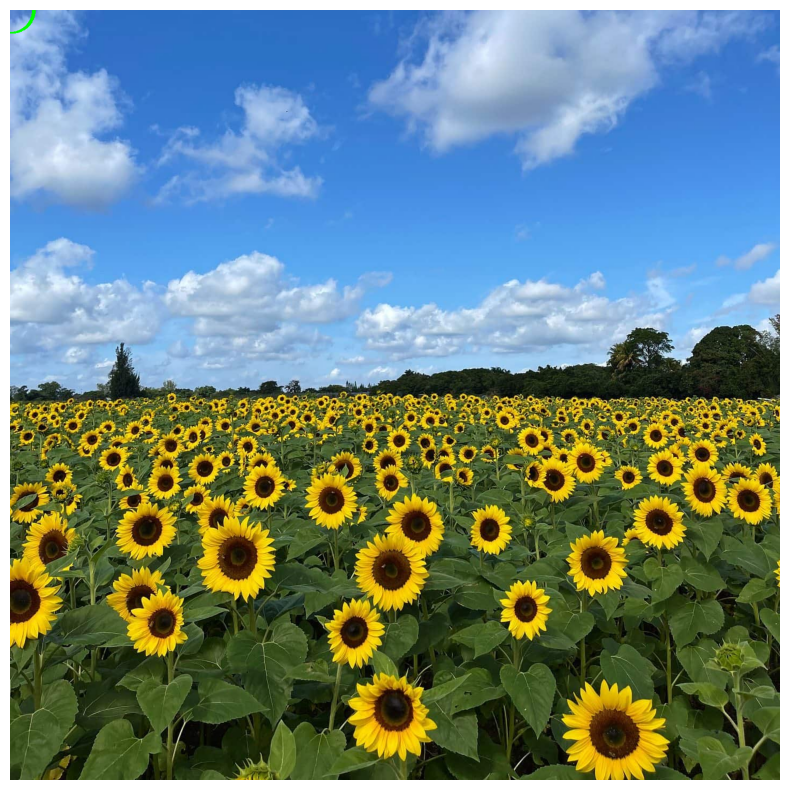

([(0, 0, 42.42640687119285),
  (1, 0, 42.42640687119285),
  (2, 0, 42.42640687119285),
  (3, 0, 42.42640687119285),
  (4, 0, 42.42640687119285)],
 (2, 30))

In [1]:
# Re-running the blob detection and image processing due to previous error.

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'the_berry_farms_sunflower_field.jpeg'
image = cv.imread(image_path, cv.IMREAD_COLOR)

# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Function to detect blobs using Laplacian of Gaussian
def detect_blobs_laplacian(image, num_scales=10, sigma_start=2, sigma_end=30):
    # List to store detected blobs (x, y, radius, sigma)
    blobs = []
    
    # Generate scale-space
    for sigma in np.linspace(sigma_start, sigma_end, num_scales):
        # Apply Gaussian blur for current scale
        blurred = cv.GaussianBlur(image, (0, 0), sigma)
        
        # Compute Laplacian
        laplacian = cv.Laplacian(blurred, cv.CV_64F)
        
        # Find local maxima (potential blob centers)
        maxima = (laplacian == cv.dilate(laplacian, None))
        
        # Get coordinates of the maxima
        coordinates = np.argwhere(maxima)
        
        # Append the blob details: center (x, y), radius (based on sigma)
        for coord in coordinates:
            y, x = coord
            blobs.append((x, y, sigma * np.sqrt(2)))  # radius is proportional to sigma
    
    return blobs

# Detect blobs in the image
blobs = detect_blobs_laplacian(gray_image)

# Sort blobs by size (radius)
blobs_sorted = sorted(blobs, key=lambda b: b[2], reverse=True)

# Extract parameters of the largest circles (blobs)
largest_blobs = blobs_sorted[:5]  # Get top 5 largest blobs

# Draw circles on the original image
output_image = image.copy()
for blob in largest_blobs:
    x, y, radius = int(blob[0]), int(blob[1]), int(blob[2])
    cv.circle(output_image, (x, y), radius, (0, 255, 0), 2)

# Display the output image with detected circles
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the largest circles parameters
largest_blobs, (2, 30)  # sigma range
